In [1]:
import numpy as np
from sklearn.feature_selection import mutual_info_regression
import pandas as pd
data = pd.read_csv('processed_data.csv')
data

,Depth (m),SPT_N,Soil Type,Vs (m/s)
0,1.5,4,Sand,70
1,3.0,5,Sand,135
2,4.5,3,Sand,175
3,6.0,2,Sand,200
4,7.5,10,Sand,290
...,...,...,...,...
7220,1.5,14,Clay,55
7221,3.0,21,Clay,60
7222,4.5,22,Clay,160
7223,6.0,17,Clay,190


In [2]:
data = pd.get_dummies(data, columns=["Soil Type"], prefix=["Soil_Type"], drop_first=True, dtype=int)
data=data.sample(frac=1.0)
data

,Depth (m),SPT_N,Vs (m/s),Soil_Type_Sand
5962,12.0,19,200,0
2258,28.5,45,295,1
1934,16.5,33,320,1
5788,7.5,14,160,0
1421,22.5,43,205,1
...,...,...,...,...
1887,28.5,25,230,1
2144,24.0,9,250,1
94,10.5,10,100,1
3479,30.0,73,419,1


In [3]:
import math
import pandas as pd
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from scipy.stats import spearmanr

class Rho_scale():
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        rho, _ = spearmanr(X, y)
        self.rho_dict = {}
        summ = 0
        
        for i, feature_name in enumerate(X.columns):
            self.rho_dict[feature_name] = math.exp(rho[i][-1])
            summ += self.rho_dict[feature_name]
        for key in self.rho_dict.keys():
            self.rho_dict[key] = self.rho_dict[key] / summ
            
        self.scaler = RobustScaler()
        self.scaler.fit(X)

    def transform(self, X_test):
        X_scaled = self.scaler.transform(X_test)
        for feature_name in self.X.columns:
            X_scaled[:, self.X.columns.get_loc(feature_name)] *= self.rho_dict[feature_name]
        return pd.DataFrame(X_scaled, columns=self.X.columns)

    def fit_transform(self, X, y):
        self.fit(X, y)
        return self.transform(X)


# No Preprocessing

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

X=data.drop('Vs (m/s)', axis=1)
y=data['Vs (m/s)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
regressors = [
    KNeighborsRegressor(n_neighbors=5),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    AdaBoostRegressor(),
    CatBoostRegressor(),
    XGBRegressor(),
    GradientBoostingRegressor(),
    VotingRegressor(estimators=[
        ('knn', KNeighborsRegressor(n_neighbors=5)),
        ('rf', RandomForestRegressor()),
        ('xgb', XGBRegressor())
    ])
]

regressor_names = []  
mae_scores = []       
mse_scores = []       
rmse_scores = []      
r2_scores = [] 



for regressor in regressors:


    regressor.fit(X_train, y_train)
    

    y_pred = regressor.predict(X_test)
    

    mae_test = mean_absolute_error(y_test, y_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    rmse_test = sqrt(mse_test)
    

    print(f"Regressor: {regressor.__class__.__name__}")
    print("Test set results:")
    print(f"Mean Absolute Error (MAE) on test data: {mae_test}")
    print(f"Mean Squared Error (MSE) on test data: {mse_test}")
    print(f"Root Mean Squared Error (RMSE) on test data: {rmse_test}")
    print(f"R-squared (R2) on test data: {r2_test}")
    print("\n")
    regressor_names.append(regressor.__class__.__name__)
    mae_scores.append(mae_test)
    mse_scores.append(mse_test)
    rmse_scores.append(rmse_test)
    r2_scores.append(r2_test)

Regressor: KNeighborsRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 46.455501730103805
Mean Squared Error (MSE) on test data: 3916.8777577854676
Root Mean Squared Error (RMSE) on test data: 62.58496431081085
R-squared (R2) on test data: 0.526087460550033


Regressor: SVR
Test set results:
Mean Absolute Error (MAE) on test data: 45.02725048577755
Mean Squared Error (MSE) on test data: 3616.903444146591
Root Mean Squared Error (RMSE) on test data: 60.14069707067412
R-squared (R2) on test data: 0.5623820802796862


Regressor: DecisionTreeRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 49.801388994795666
Mean Squared Error (MSE) on test data: 4764.977181633305
Root Mean Squared Error (RMSE) on test data: 69.02881414042476
R-squared (R2) on test data: 0.4234738543779005


Regressor: RandomForestRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 47.04698858972815
Mean Squared Error (MSE) on test data: 4156.90075242961
Root Mean Square

313:	learn: 55.7875546	total: 204ms	remaining: 447ms
314:	learn: 55.7764963	total: 205ms	remaining: 446ms
315:	learn: 55.7725768	total: 206ms	remaining: 445ms
316:	learn: 55.7673019	total: 206ms	remaining: 444ms
317:	learn: 55.7588993	total: 207ms	remaining: 443ms
318:	learn: 55.7542518	total: 207ms	remaining: 442ms
319:	learn: 55.7504383	total: 208ms	remaining: 441ms
320:	learn: 55.7500134	total: 208ms	remaining: 440ms
321:	learn: 55.7494048	total: 209ms	remaining: 439ms
322:	learn: 55.7402472	total: 209ms	remaining: 438ms
323:	learn: 55.7342076	total: 210ms	remaining: 437ms
324:	learn: 55.7322508	total: 210ms	remaining: 436ms
325:	learn: 55.7211484	total: 211ms	remaining: 435ms
326:	learn: 55.7131481	total: 211ms	remaining: 434ms
327:	learn: 55.7058309	total: 212ms	remaining: 434ms
328:	learn: 55.7037150	total: 212ms	remaining: 433ms
329:	learn: 55.6950374	total: 213ms	remaining: 432ms
330:	learn: 55.6885907	total: 213ms	remaining: 431ms
331:	learn: 55.6842190	total: 214ms	remaining:

633:	learn: 54.5024754	total: 362ms	remaining: 209ms
634:	learn: 54.4987272	total: 363ms	remaining: 209ms
635:	learn: 54.4952149	total: 363ms	remaining: 208ms
636:	learn: 54.4905575	total: 364ms	remaining: 207ms
637:	learn: 54.4871515	total: 364ms	remaining: 207ms
638:	learn: 54.4827776	total: 365ms	remaining: 206ms
639:	learn: 54.4783410	total: 365ms	remaining: 206ms
640:	learn: 54.4754884	total: 366ms	remaining: 205ms
641:	learn: 54.4732582	total: 366ms	remaining: 204ms
642:	learn: 54.4718425	total: 367ms	remaining: 204ms
643:	learn: 54.4717115	total: 367ms	remaining: 203ms
644:	learn: 54.4687611	total: 368ms	remaining: 203ms
645:	learn: 54.4685337	total: 368ms	remaining: 202ms
646:	learn: 54.4659097	total: 369ms	remaining: 201ms
647:	learn: 54.4620288	total: 369ms	remaining: 201ms
648:	learn: 54.4593918	total: 370ms	remaining: 200ms
649:	learn: 54.4547775	total: 371ms	remaining: 200ms
650:	learn: 54.4491788	total: 371ms	remaining: 199ms
651:	learn: 54.4444817	total: 372ms	remaining:

946:	learn: 53.6708896	total: 519ms	remaining: 29.1ms
947:	learn: 53.6676133	total: 520ms	remaining: 28.5ms
948:	learn: 53.6659655	total: 520ms	remaining: 28ms
949:	learn: 53.6646253	total: 521ms	remaining: 27.4ms
950:	learn: 53.6624307	total: 521ms	remaining: 26.9ms
951:	learn: 53.6603799	total: 522ms	remaining: 26.3ms
952:	learn: 53.6587449	total: 522ms	remaining: 25.8ms
953:	learn: 53.6572109	total: 523ms	remaining: 25.2ms
954:	learn: 53.6541866	total: 523ms	remaining: 24.7ms
955:	learn: 53.6509536	total: 524ms	remaining: 24.1ms
956:	learn: 53.6490457	total: 524ms	remaining: 23.6ms
957:	learn: 53.6474502	total: 525ms	remaining: 23ms
958:	learn: 53.6459358	total: 525ms	remaining: 22.5ms
959:	learn: 53.6421939	total: 526ms	remaining: 21.9ms
960:	learn: 53.6412998	total: 527ms	remaining: 21.4ms
961:	learn: 53.6395678	total: 527ms	remaining: 20.8ms
962:	learn: 53.6383726	total: 528ms	remaining: 20.3ms
963:	learn: 53.6381397	total: 528ms	remaining: 19.7ms
964:	learn: 53.6355942	total: 52

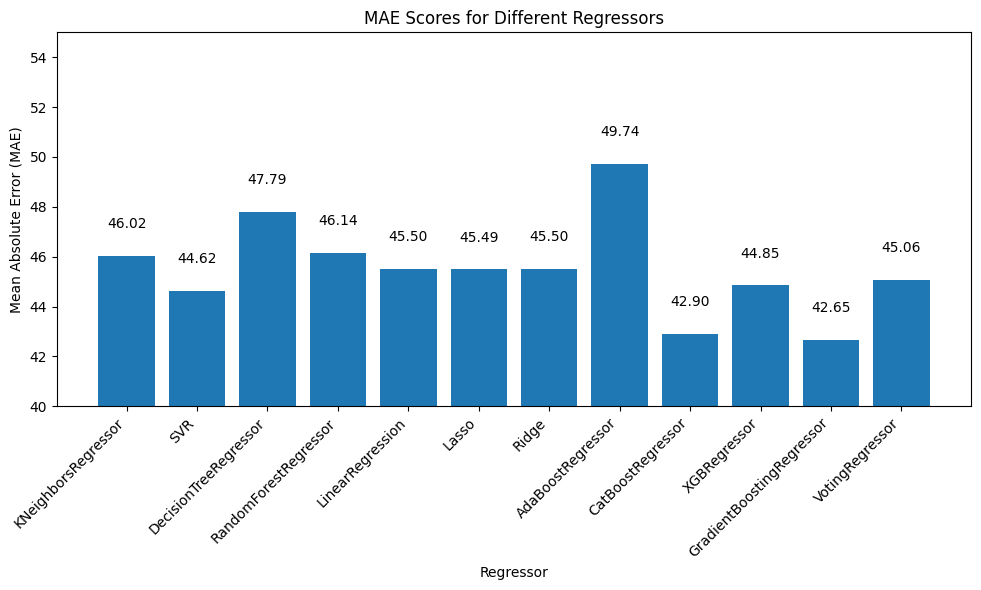

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bar_plot = plt.bar(regressor_names, mae_scores)
plt.xlabel('Regressor')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Scores for Different Regressors')
plt.xticks(rotation=45, ha="right") 
plt.ylim(40, 55)

for bar, mae in zip(bar_plot, mae_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, mae + 1, f'{mae:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Feature Scaling with Newly Developed Suprvised feature scaler

In [7]:

rho_scaler = Rho_scale()

rho_scaler.fit(X_train, y_train)


X_train_scaled = rho_scaler.transform(X_train)
X_test_scaled = rho_scaler.transform(X_test)


regressors = [
    KNeighborsRegressor(n_neighbors=5),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    AdaBoostRegressor(),
    CatBoostRegressor(),
    XGBRegressor(),
    GradientBoostingRegressor(),
    VotingRegressor(estimators=[
        ('knn', KNeighborsRegressor(n_neighbors=5)),
        ('rf', RandomForestRegressor()),
        ('xgb', XGBRegressor())
    ])
]



regressor_names = []  
mae_scores = []       
mse_scores = []       
rmse_scores = []      
r2_scores = [] 


rho_scaler = Rho_scale()
rho_scaler.fit(X_train, y_train)
    

X_train_scaled = rho_scaler.transform(X_train)
X_test_scaled = rho_scaler.transform(X_test)
    

for regressor in regressors:


    regressor.fit(X_train_scaled, y_train)
    

    y_pred = regressor.predict(X_test_scaled)
    

    mae_test = mean_absolute_error(y_test, y_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    rmse_test = sqrt(mse_test)
    

    print(f"Regressor: {regressor.__class__.__name__}")
    print("Test set results:")
    print(f"Mean Absolute Error (MAE) on test data: {mae_test}")
    print(f"Mean Squared Error (MSE) on test data: {mse_test}")
    print(f"Root Mean Squared Error (RMSE) on test data: {rmse_test}")
    print(f"R-squared (R2) on test data: {r2_test}")
    print("\n")
    regressor_names.append(regressor.__class__.__name__)
    mae_scores.append(mae_test)
    mse_scores.append(mse_test)
    rmse_scores.append(rmse_test)
    r2_scores.append(r2_test)
    

Regressor: KNeighborsRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 45.956262975778536
Mean Squared Error (MSE) on test data: 3840.538961937716
Root Mean Squared Error (RMSE) on test data: 61.97208211717366
R-squared (R2) on test data: 0.5353238766028062


Regressor: SVR
Test set results:
Mean Absolute Error (MAE) on test data: 44.11026781852523
Mean Squared Error (MSE) on test data: 3505.0587306073685
Root Mean Squared Error (RMSE) on test data: 59.203536470445485
R-squared (R2) on test data: 0.5759144434258354


Regressor: DecisionTreeRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 49.71776731082796
Mean Squared Error (MSE) on test data: 4754.808073597934
Root Mean Squared Error (RMSE) on test data: 68.95511636998326
R-squared (R2) on test data: 0.42470423942206104


Regressor: RandomForestRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 46.859859036957
Mean Squared Error (MSE) on test data: 4166.840574316828
Root Mean Squar

169:	learn: 56.5360140	total: 82.4ms	remaining: 402ms
170:	learn: 56.5331419	total: 83ms	remaining: 402ms
171:	learn: 56.5303809	total: 83.4ms	remaining: 402ms
172:	learn: 56.5194518	total: 84ms	remaining: 401ms
173:	learn: 56.5149161	total: 84.5ms	remaining: 401ms
174:	learn: 56.5111255	total: 85ms	remaining: 401ms
175:	learn: 56.5052342	total: 85.6ms	remaining: 401ms
176:	learn: 56.5027777	total: 86.1ms	remaining: 400ms
177:	learn: 56.5013107	total: 86.6ms	remaining: 400ms
178:	learn: 56.4966063	total: 87.1ms	remaining: 399ms
179:	learn: 56.4899569	total: 87.6ms	remaining: 399ms
180:	learn: 56.4874080	total: 88.1ms	remaining: 399ms
181:	learn: 56.4854767	total: 88.6ms	remaining: 398ms
182:	learn: 56.4732185	total: 89.1ms	remaining: 398ms
183:	learn: 56.4701990	total: 89.5ms	remaining: 397ms
184:	learn: 56.4610363	total: 90ms	remaining: 396ms
185:	learn: 56.4599639	total: 90.3ms	remaining: 395ms
186:	learn: 56.4538359	total: 90.8ms	remaining: 395ms
187:	learn: 56.4499799	total: 91.3ms

494:	learn: 54.9691641	total: 240ms	remaining: 244ms
495:	learn: 54.9683882	total: 240ms	remaining: 244ms
496:	learn: 54.9640105	total: 241ms	remaining: 244ms
497:	learn: 54.9630693	total: 241ms	remaining: 243ms
498:	learn: 54.9606110	total: 242ms	remaining: 243ms
499:	learn: 54.9599613	total: 242ms	remaining: 242ms
500:	learn: 54.9578659	total: 243ms	remaining: 242ms
501:	learn: 54.9531364	total: 243ms	remaining: 241ms
502:	learn: 54.9443523	total: 244ms	remaining: 241ms
503:	learn: 54.9371012	total: 244ms	remaining: 240ms
504:	learn: 54.9320206	total: 245ms	remaining: 240ms
505:	learn: 54.9279206	total: 245ms	remaining: 239ms
506:	learn: 54.9237568	total: 246ms	remaining: 239ms
507:	learn: 54.9228794	total: 246ms	remaining: 238ms
508:	learn: 54.9199480	total: 247ms	remaining: 238ms
509:	learn: 54.9176278	total: 247ms	remaining: 237ms
510:	learn: 54.9158900	total: 248ms	remaining: 237ms
511:	learn: 54.9136472	total: 248ms	remaining: 237ms
512:	learn: 54.9113803	total: 249ms	remaining:

815:	learn: 53.9948066	total: 397ms	remaining: 89.5ms
816:	learn: 53.9916742	total: 398ms	remaining: 89.1ms
817:	learn: 53.9870172	total: 398ms	remaining: 88.6ms
818:	learn: 53.9808500	total: 399ms	remaining: 88.1ms
819:	learn: 53.9797474	total: 399ms	remaining: 87.6ms
820:	learn: 53.9796707	total: 400ms	remaining: 87.1ms
821:	learn: 53.9774239	total: 400ms	remaining: 86.7ms
822:	learn: 53.9758977	total: 401ms	remaining: 86.2ms
823:	learn: 53.9731627	total: 401ms	remaining: 85.7ms
824:	learn: 53.9727466	total: 402ms	remaining: 85.2ms
825:	learn: 53.9687231	total: 402ms	remaining: 84.7ms
826:	learn: 53.9653041	total: 403ms	remaining: 84.3ms
827:	learn: 53.9602744	total: 403ms	remaining: 83.8ms
828:	learn: 53.9553283	total: 404ms	remaining: 83.3ms
829:	learn: 53.9500090	total: 404ms	remaining: 82.8ms
830:	learn: 53.9474869	total: 405ms	remaining: 82.3ms
831:	learn: 53.9461463	total: 405ms	remaining: 81.8ms
832:	learn: 53.9420366	total: 406ms	remaining: 81.4ms
833:	learn: 53.9407827	total

Regressor: XGBRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 44.35570032984328
Mean Squared Error (MSE) on test data: 3710.898024676405
Root Mean Squared Error (RMSE) on test data: 60.91714064757476
R-squared (R2) on test data: 0.5510094480179627


Regressor: GradientBoostingRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 41.96950432658718
Mean Squared Error (MSE) on test data: 3327.109193969909
Root Mean Squared Error (RMSE) on test data: 57.68109910507869
R-squared (R2) on test data: 0.5974449894415179


Regressor: VotingRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 45.01838902574592
Mean Squared Error (MSE) on test data: 3749.701163894384
Root Mean Squared Error (RMSE) on test data: 61.23480353438218
R-squared (R2) on test data: 0.5463145620954006




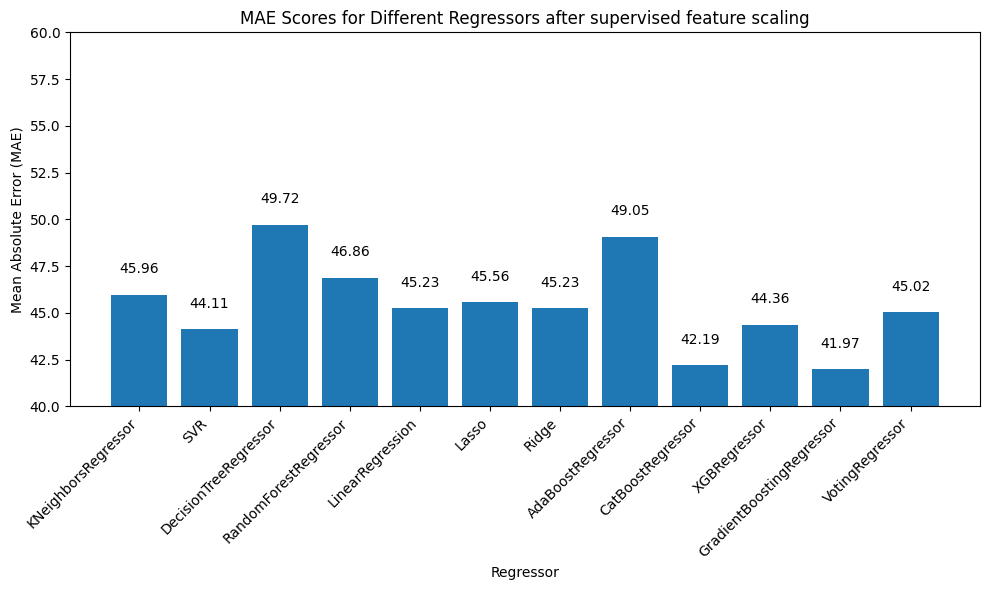

In [8]:
plt.figure(figsize=(10, 6))
bar_plot = plt.bar(regressor_names, mae_scores)
plt.xlabel('Regressor')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Scores for Different Regressors after supervised feature scaling')
plt.xticks(rotation=45, ha="right") 
plt.ylim(40, 60)

for bar, mae in zip(bar_plot, mae_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, mae + 1, f'{mae:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# The proposed feature scaling reduced the error 
# Delete Outliers (in training data) with supervised feature scaling

In [9]:
from scipy import stats

z_scores_x = np.abs(stats.zscore(X_train))
z_scores_y = np.abs(stats.zscore(y_train))
threshold = 3

outliers_x = np.where(z_scores_x > threshold)
outliers_y = np.where(z_scores_y > threshold)

common_indices = np.intersect1d(outliers_x, outliers_y)

X_train_clean = np.delete(X_train, common_indices, axis=0)
y_train_clean = np.delete(y_train, common_indices)
X_train_clean = pd.DataFrame(X_train_clean, columns=X_train.columns)

In [10]:

rho_scaler = Rho_scale()

rho_scaler.fit(X_train_clean, y_train_clean)


X_train_scaled = rho_scaler.transform(X_train_clean)
X_test_scaled = rho_scaler.transform(X_test)


regressors = [
    KNeighborsRegressor(n_neighbors=5),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    AdaBoostRegressor(),
    CatBoostRegressor(),
    XGBRegressor(),
    GradientBoostingRegressor(),
    VotingRegressor(estimators=[
        ('knn', KNeighborsRegressor(n_neighbors=5)),
        ('rf', RandomForestRegressor()),
        ('xgb', XGBRegressor())
    ])
]



regressor_names = []  
mae_scores = []       
mse_scores = []       
rmse_scores = []      
r2_scores = [] 



for regressor in regressors:


    regressor.fit(X_train_scaled, y_train_clean)
    

    y_pred = regressor.predict(X_test_scaled)
    

    mae_test = mean_absolute_error(y_test, y_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    rmse_test = sqrt(mse_test)
    

    print(f"Regressor: {regressor.__class__.__name__}")
    print("Test set results:")
    print(f"Mean Absolute Error (MAE) on test data: {mae_test}")
    print(f"Mean Squared Error (MSE) on test data: {mse_test}")
    print(f"Root Mean Squared Error (RMSE) on test data: {rmse_test}")
    print(f"R-squared (R2) on test data: {r2_test}")
    print("\n")
    regressor_names.append(regressor.__class__.__name__)
    mae_scores.append(mae_test)
    mse_scores.append(mse_test)
    rmse_scores.append(rmse_test)
    r2_scores.append(r2_test)
    

Regressor: KNeighborsRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 46.00567474048443
Mean Squared Error (MSE) on test data: 3845.124235294117
Root Mean Squared Error (RMSE) on test data: 62.00906575085708
R-squared (R2) on test data: 0.5347690932588316


Regressor: SVR
Test set results:
Mean Absolute Error (MAE) on test data: 44.110752901811956
Mean Squared Error (MSE) on test data: 3507.915529994728
Root Mean Squared Error (RMSE) on test data: 59.227658488198976
R-squared (R2) on test data: 0.5755687923394128


Regressor: DecisionTreeRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 49.57486073643349
Mean Squared Error (MSE) on test data: 4730.135349026013
Root Mean Squared Error (RMSE) on test data: 68.77597944795852
R-squared (R2) on test data: 0.4276894522063476


Regressor: RandomForestRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 46.647042007817234
Mean Squared Error (MSE) on test data: 4101.03049073144
Root Mean Squar

117:	learn: 56.3826850	total: 56.7ms	remaining: 424ms
118:	learn: 56.3711904	total: 57.3ms	remaining: 424ms
119:	learn: 56.3656644	total: 57.8ms	remaining: 424ms
120:	learn: 56.3626045	total: 58.3ms	remaining: 423ms
121:	learn: 56.3553229	total: 58.8ms	remaining: 423ms
122:	learn: 56.3483000	total: 59.3ms	remaining: 423ms
123:	learn: 56.3344408	total: 59.8ms	remaining: 422ms
124:	learn: 56.3309167	total: 60.3ms	remaining: 422ms
125:	learn: 56.3261894	total: 60.7ms	remaining: 421ms
126:	learn: 56.3235971	total: 61.2ms	remaining: 421ms
127:	learn: 56.3178918	total: 61.8ms	remaining: 421ms
128:	learn: 56.3157964	total: 62.3ms	remaining: 421ms
129:	learn: 56.3079529	total: 62.8ms	remaining: 420ms
130:	learn: 56.3059967	total: 63.3ms	remaining: 420ms
131:	learn: 56.2986302	total: 63.8ms	remaining: 419ms
132:	learn: 56.2819383	total: 64.3ms	remaining: 419ms
133:	learn: 56.2702666	total: 64.9ms	remaining: 419ms
134:	learn: 56.2581039	total: 65.4ms	remaining: 419ms
135:	learn: 56.2536806	total

440:	learn: 54.7370329	total: 214ms	remaining: 271ms
441:	learn: 54.7327581	total: 214ms	remaining: 271ms
442:	learn: 54.7320614	total: 215ms	remaining: 270ms
443:	learn: 54.7281426	total: 215ms	remaining: 270ms
444:	learn: 54.7236834	total: 216ms	remaining: 269ms
445:	learn: 54.7226476	total: 216ms	remaining: 269ms
446:	learn: 54.7191043	total: 217ms	remaining: 268ms
447:	learn: 54.7163536	total: 217ms	remaining: 268ms
448:	learn: 54.7121243	total: 218ms	remaining: 267ms
449:	learn: 54.7083463	total: 218ms	remaining: 267ms
450:	learn: 54.7047823	total: 219ms	remaining: 267ms
451:	learn: 54.6941031	total: 219ms	remaining: 266ms
452:	learn: 54.6938395	total: 220ms	remaining: 266ms
453:	learn: 54.6912836	total: 220ms	remaining: 265ms
454:	learn: 54.6857861	total: 221ms	remaining: 265ms
455:	learn: 54.6800915	total: 221ms	remaining: 264ms
456:	learn: 54.6746566	total: 222ms	remaining: 264ms
457:	learn: 54.6718112	total: 223ms	remaining: 263ms
458:	learn: 54.6682820	total: 223ms	remaining:

755:	learn: 53.7916035	total: 371ms	remaining: 120ms
756:	learn: 53.7859395	total: 371ms	remaining: 119ms
757:	learn: 53.7857448	total: 372ms	remaining: 119ms
758:	learn: 53.7842679	total: 372ms	remaining: 118ms
759:	learn: 53.7837169	total: 373ms	remaining: 118ms
760:	learn: 53.7835358	total: 373ms	remaining: 117ms
761:	learn: 53.7819496	total: 374ms	remaining: 117ms
762:	learn: 53.7792722	total: 374ms	remaining: 116ms
763:	learn: 53.7776011	total: 375ms	remaining: 116ms
764:	learn: 53.7757804	total: 375ms	remaining: 115ms
765:	learn: 53.7716511	total: 376ms	remaining: 115ms
766:	learn: 53.7704850	total: 376ms	remaining: 114ms
767:	learn: 53.7695615	total: 377ms	remaining: 114ms
768:	learn: 53.7669576	total: 377ms	remaining: 113ms
769:	learn: 53.7637755	total: 378ms	remaining: 113ms
770:	learn: 53.7630709	total: 378ms	remaining: 112ms
771:	learn: 53.7572556	total: 379ms	remaining: 112ms
772:	learn: 53.7553273	total: 379ms	remaining: 111ms
773:	learn: 53.7521958	total: 380ms	remaining:

Regressor: CatBoostRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 41.834793415704276
Mean Squared Error (MSE) on test data: 3267.8577428432072
Root Mean Squared Error (RMSE) on test data: 57.165179461305
R-squared (R2) on test data: 0.6046139662148514


Regressor: XGBRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 44.377510345353386
Mean Squared Error (MSE) on test data: 3735.4838663002547
Root Mean Squared Error (RMSE) on test data: 61.11860491127276
R-squared (R2) on test data: 0.5480347474122791


Regressor: GradientBoostingRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 41.737921723377895
Mean Squared Error (MSE) on test data: 3310.801739112644
Root Mean Squared Error (RMSE) on test data: 57.539566726841485
R-squared (R2) on test data: 0.5994180679548851


Regressor: VotingRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 45.014713369494416
Mean Squared Error (MSE) on test data: 3758.1761550356823
Root M

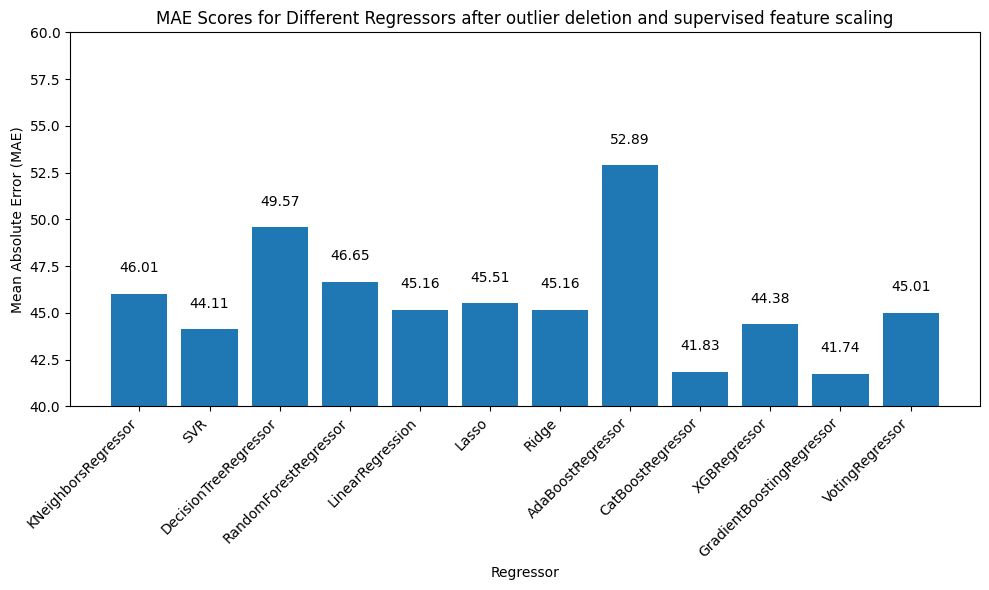

In [11]:
plt.figure(figsize=(10, 6))
bar_plot = plt.bar(regressor_names, mae_scores)
plt.xlabel('Regressor')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Scores for Different Regressors after outlier deletion and supervised feature scaling')
plt.xticks(rotation=45, ha="right") 
plt.ylim(40, 60)

for bar, mae in zip(bar_plot, mae_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, mae + 1, f'{mae:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [12]:
best_model=GradientBoostingRegressor()

best_model.fit(X_train_scaled, y_train_clean)
y_pred = best_model.predict(X_test_scaled)
mae_test = mean_absolute_error(y_test, y_pred)

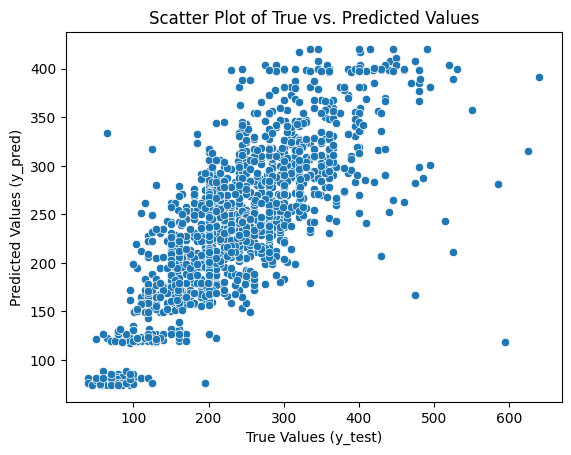

In [13]:
import seaborn as sns
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Scatter Plot of True vs. Predicted Values')
plt.show()

## Relatively Better
# Try deleting the least-contributing Column

In [14]:
X_train_clean=X_train_clean.drop('Soil_Type_Sand',axis=1)
X_train_clean

,Depth (m),SPT_N
0,10.5,14.0
1,21.0,38.0
2,1.5,2.0
3,16.5,29.0
4,15.0,22.0
...,...,...
5767,27.0,71.0
5768,16.5,33.0
5769,19.5,28.0
5770,27.0,20.0


In [15]:
X_test=X_test.drop('Soil_Type_Sand',axis=1)
X_test

,Depth (m),SPT_N
6665,27.0,18
1794,19.5,5
3469,13.5,17
2826,24.0,24
2510,3.0,4
...,...,...
5570,21.0,9
7018,15.0,14
4073,28.5,20
197,13.5,11


In [16]:

rho_scaler = Rho_scale()

rho_scaler.fit(X_train_clean, y_train_clean)


X_train_scaled = rho_scaler.transform(X_train_clean)
X_test_scaled = rho_scaler.transform(X_test)


regressors = [
    KNeighborsRegressor(n_neighbors=5),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    AdaBoostRegressor(),
    CatBoostRegressor(),
    XGBRegressor(),
    GradientBoostingRegressor(),
    VotingRegressor(estimators=[
        ('knn', KNeighborsRegressor(n_neighbors=5)),
        ('rf', RandomForestRegressor()),
        ('xgb', XGBRegressor())
    ])
]



regressor_names = []  
mae_scores = []       
mse_scores = []       
rmse_scores = []      
r2_scores = [] 



for regressor in regressors:


    regressor.fit(X_train_scaled, y_train_clean)
    

    y_pred = regressor.predict(X_test_scaled)
    

    mae_test = mean_absolute_error(y_test, y_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    rmse_test = sqrt(mse_test)
    

    print(f"Regressor: {regressor.__class__.__name__}")
    print("Test set results:")
    print(f"Mean Absolute Error (MAE) on test data: {mae_test}")
    print(f"Mean Squared Error (MSE) on test data: {mse_test}")
    print(f"Root Mean Squared Error (RMSE) on test data: {rmse_test}")
    print(f"R-squared (R2) on test data: {r2_test}")
    print("\n")
    regressor_names.append(regressor.__class__.__name__)
    mae_scores.append(mae_test)
    mse_scores.append(mse_test)
    rmse_scores.append(rmse_test)
    r2_scores.append(r2_test)
    

Regressor: KNeighborsRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 46.01536332179931
Mean Squared Error (MSE) on test data: 3875.1236816609003
Root Mean Squared Error (RMSE) on test data: 62.25049141702337
R-squared (R2) on test data: 0.5311393874857789


Regressor: SVR
Test set results:
Mean Absolute Error (MAE) on test data: 44.616930018399806
Mean Squared Error (MSE) on test data: 3563.8106319986605
Root Mean Squared Error (RMSE) on test data: 59.69766018864274
R-squared (R2) on test data: 0.5688059083865382


Regressor: DecisionTreeRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 47.78773334939601
Mean Squared Error (MSE) on test data: 4367.104310661232
Root Mean Squared Error (RMSE) on test data: 66.084070021914
R-squared (R2) on test data: 0.4716134579909659


Regressor: RandomForestRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 46.13957905315627
Mean Squared Error (MSE) on test data: 4035.171831189168
Root Mean Square

133:	learn: 57.2216013	total: 66.5ms	remaining: 429ms
134:	learn: 57.2196682	total: 67ms	remaining: 430ms
135:	learn: 57.2181134	total: 67.5ms	remaining: 429ms
136:	learn: 57.2106611	total: 68ms	remaining: 429ms
137:	learn: 57.2052667	total: 68.5ms	remaining: 428ms
138:	learn: 57.1985986	total: 69.1ms	remaining: 428ms
139:	learn: 57.1960426	total: 69.5ms	remaining: 427ms
140:	learn: 57.1953622	total: 70ms	remaining: 427ms
141:	learn: 57.1910377	total: 70.5ms	remaining: 426ms
142:	learn: 57.1838460	total: 71ms	remaining: 426ms
143:	learn: 57.1813429	total: 71.5ms	remaining: 425ms
144:	learn: 57.1797452	total: 72ms	remaining: 424ms
145:	learn: 57.1764300	total: 72.5ms	remaining: 424ms
146:	learn: 57.1736701	total: 72.9ms	remaining: 423ms
147:	learn: 57.1724243	total: 73.3ms	remaining: 422ms
148:	learn: 57.1714570	total: 73.7ms	remaining: 421ms
149:	learn: 57.1700129	total: 74.2ms	remaining: 420ms
150:	learn: 57.1669578	total: 74.6ms	remaining: 420ms
151:	learn: 57.1639423	total: 75.1ms	r

458:	learn: 55.8703998	total: 223ms	remaining: 263ms
459:	learn: 55.8668435	total: 224ms	remaining: 262ms
460:	learn: 55.8628550	total: 224ms	remaining: 262ms
461:	learn: 55.8585507	total: 225ms	remaining: 262ms
462:	learn: 55.8546654	total: 225ms	remaining: 261ms
463:	learn: 55.8505983	total: 226ms	remaining: 261ms
464:	learn: 55.8464190	total: 226ms	remaining: 260ms
465:	learn: 55.8410357	total: 227ms	remaining: 260ms
466:	learn: 55.8391822	total: 227ms	remaining: 259ms
467:	learn: 55.8376442	total: 228ms	remaining: 259ms
468:	learn: 55.8331277	total: 228ms	remaining: 258ms
469:	learn: 55.8308590	total: 229ms	remaining: 258ms
470:	learn: 55.8271295	total: 229ms	remaining: 257ms
471:	learn: 55.8269333	total: 230ms	remaining: 257ms
472:	learn: 55.8261824	total: 230ms	remaining: 256ms
473:	learn: 55.8202916	total: 231ms	remaining: 256ms
474:	learn: 55.8195370	total: 231ms	remaining: 256ms
475:	learn: 55.8111793	total: 232ms	remaining: 255ms
476:	learn: 55.8069356	total: 232ms	remaining:

778:	learn: 55.0629313	total: 379ms	remaining: 108ms
779:	learn: 55.0624753	total: 380ms	remaining: 107ms
780:	learn: 55.0598249	total: 381ms	remaining: 107ms
781:	learn: 55.0564722	total: 381ms	remaining: 106ms
782:	learn: 55.0543766	total: 382ms	remaining: 106ms
783:	learn: 55.0536448	total: 382ms	remaining: 105ms
784:	learn: 55.0530318	total: 383ms	remaining: 105ms
785:	learn: 55.0516172	total: 383ms	remaining: 104ms
786:	learn: 55.0489729	total: 384ms	remaining: 104ms
787:	learn: 55.0429197	total: 384ms	remaining: 103ms
788:	learn: 55.0406970	total: 385ms	remaining: 103ms
789:	learn: 55.0386017	total: 385ms	remaining: 102ms
790:	learn: 55.0384671	total: 386ms	remaining: 102ms
791:	learn: 55.0384132	total: 386ms	remaining: 101ms
792:	learn: 55.0373024	total: 387ms	remaining: 101ms
793:	learn: 55.0332655	total: 387ms	remaining: 100ms
794:	learn: 55.0328685	total: 388ms	remaining: 99.9ms
795:	learn: 55.0313759	total: 388ms	remaining: 99.5ms
796:	learn: 55.0265459	total: 389ms	remainin

Regressor: CatBoostRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 42.89965152814333
Mean Squared Error (MSE) on test data: 3409.570411958358
Root Mean Squared Error (RMSE) on test data: 58.39152688497157
R-squared (R2) on test data: 0.5874678066853376


Regressor: XGBRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 44.84575052756339
Mean Squared Error (MSE) on test data: 3748.9174751834
Root Mean Squared Error (RMSE) on test data: 61.228404153492356
R-squared (R2) on test data: 0.5464093824932093


Regressor: GradientBoostingRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 42.64906913814026
Mean Squared Error (MSE) on test data: 3417.172523806632
Root Mean Squared Error (RMSE) on test data: 58.456586658875594
R-squared (R2) on test data: 0.5865480087355452


Regressor: VotingRegressor
Test set results:
Mean Absolute Error (MAE) on test data: 45.062634096055746
Mean Squared Error (MSE) on test data: 3771.9189183841654
Root Mean 

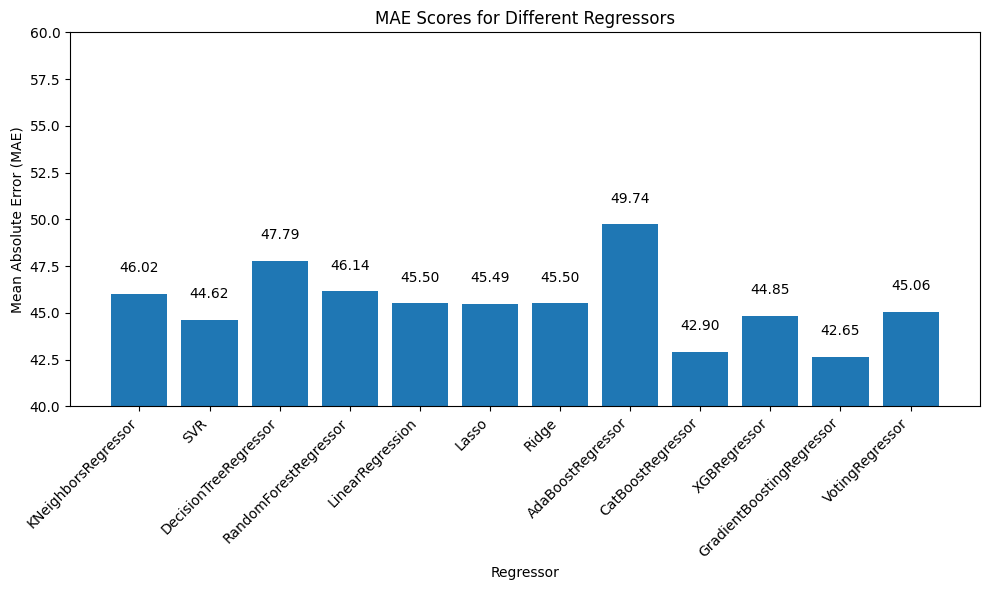

In [17]:
plt.figure(figsize=(10, 6))
bar_plot = plt.bar(regressor_names, mae_scores)
plt.xlabel('Regressor')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Scores for Different Regressors')
plt.xticks(rotation=45, ha="right") 
plt.ylim(40, 60)

for bar, mae in zip(bar_plot, mae_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, mae + 1, f'{mae:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Gradient Boosting performed better
# Best performance provided by supervised feature scaling with outlier deletion and Soil_Type deletion

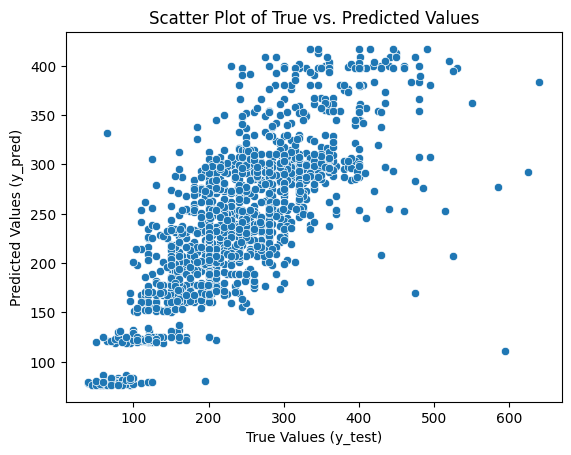

In [18]:
best_model=GradientBoostingRegressor()

best_model.fit(X_train_scaled, y_train_clean)
y_pred = best_model.predict(X_test_scaled)
mae_test = mean_absolute_error(y_test, y_pred)

sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('Scatter Plot of True vs. Predicted Values')
plt.show()